In [1]:
%matplotlib inline
from imgseries import ImgSeries
import matplotlib.pyplot as plt
from pathlib import Path

# Define ImgSeries object

In [2]:
basefolder = Path('data')
folders = [basefolder / folder for folder in ('img1', 'img2')]
images = ImgSeries(folders, savepath=basefolder)

**NOTE**: see further below for the case where the images are within a TIFF stack

# Access, read and show individual images

In [3]:
images.files[33]

filo.File #33 [img-00643.png in folder 'data\img2']

In [4]:
images.files[33].file

WindowsPath('data/img2/img-00643.png')

In [5]:
ii = images.read(33)  # read image num 33 as an array

<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

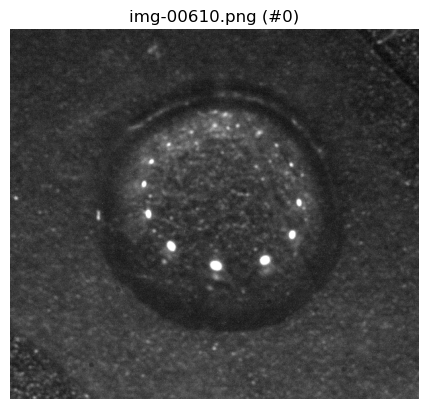

In [6]:
images.show()  # show first image in the series (auto grayscale)

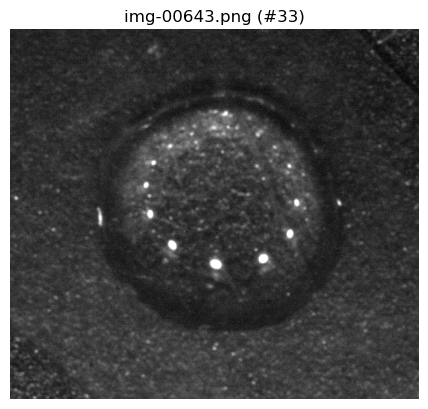

In [7]:
ax = images.show(33)  # show specific image in the series

# Define `Display Parameters`: contrast / colormap

These parameters are only applied when showing the images (in matplotlib `imshow()`), but DO NOT impact analysis. In particular, changing the contrast does not changes the pixel value in the images. This is important e.g. for further analysis based on grayscale values : the grayscales to consider are the initial pixel values.

**NOTE**: see Interactive version of this notebook to define contrast interactively

## Contrast

<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

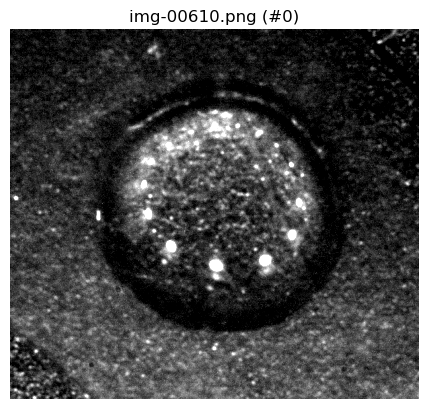

In [8]:
images.contrast.vmin = 60
images.contrast.vmax = 140
images.show()

<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

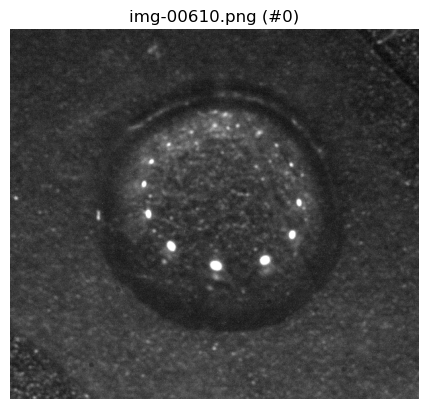

In [9]:
images.contrast.reset()  # go back to auto grayscale
images.show()

## Colormap

<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

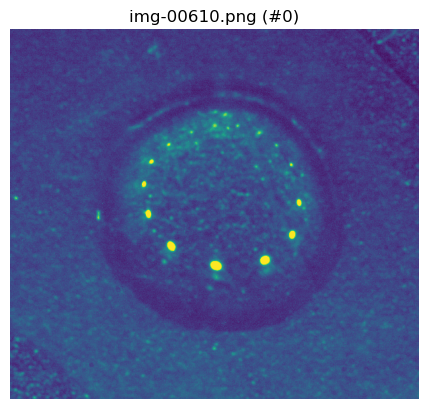

In [10]:
images.colors.cmap = 'viridis'  # any matplotlib accepted colormap name
images.show()

<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

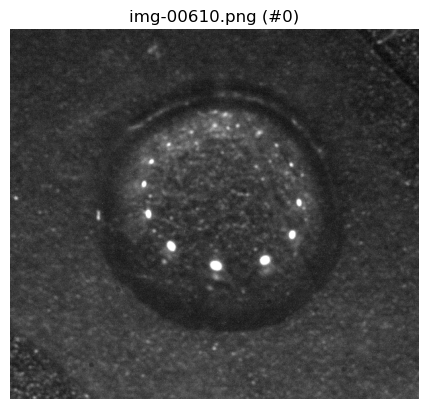

In [11]:
images.colors.reset()
images.show()

## Save / load display parameters

In [12]:
images.contrast.vmin = 50
images.contrast.vmax = 150
images.colors.cmap = 'gray'

images.save_display()

In [13]:
images.load_display()
print(images.contrast.vmin, images.contrast.vmax, images.colors.cmap)

50 150 gray


# Define `Transform Parameters`: rotation, crop, filter, subtraction

These parameters are applied on all images upon reading with `read()` and are taken into account when running analysis methods. Rotation is applied BEFORE crop.

**NOTE**: see Interactive version of this notebook to define rotation angle and crop interactively

## Rotation

<AxesSubplot: title={'center': 'Rotation: -66.6° (img #0)'}>

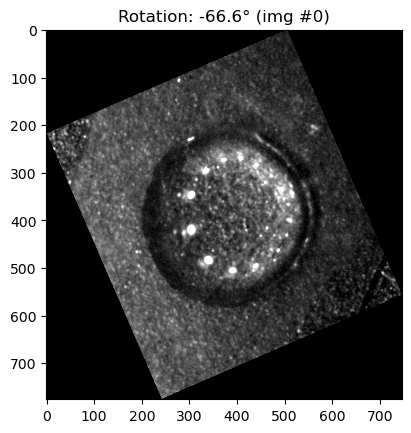

In [14]:
images.rotation.angle = -66.6  # equivalently, images.rotation.data['angle'] = -66.6, but this is not recommended because it can interfere with caching when used.
images.rotation.show()

## Crop

**NOTE**: Needs to be done **AFTER** defining the rotation (if rotation needs to be defined), because the cropping applies to the coordinates in the rotated image.

<AxesSubplot: title={'center': 'Crop Zone (img #0)'}>

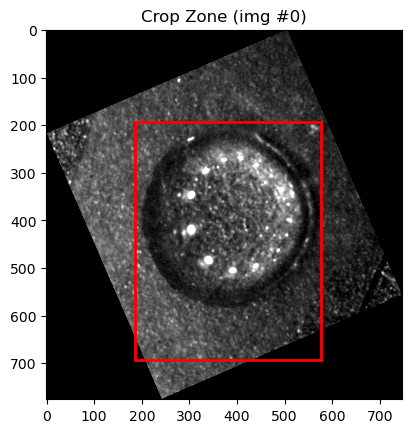

In [15]:
images.crop.zone = (186, 193, 391, 500)
images.crop.show()

<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

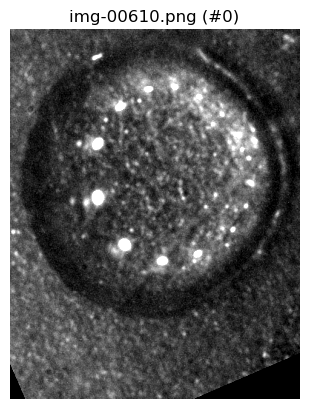

In [16]:
images.show()

## Subtraction

In [17]:
images.subtraction.reference = range(10)
images.subtraction.relative = True

C:\Users\olivier.vincent\Python-OV\imgseries\imgseries\general.py:112: RuntimeWarning: invalid value encountered in divide
  return (img - img_ref) / img_ref


<AxesSubplot: title={'center': 'img-00620.png (#10)'}>

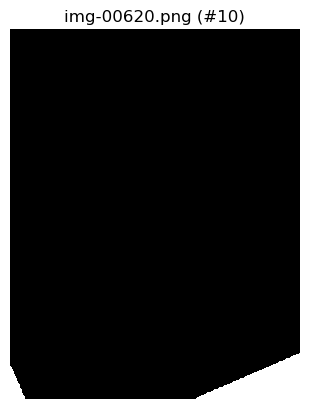

In [18]:
images.show(num=10)

## Filter

C:\Users\olivier.vincent\Python-OV\imgseries\imgseries\general.py:112: RuntimeWarning: divide by zero encountered in divide
  return (img - img_ref) / img_ref


<AxesSubplot: title={'center': 'img-00610.png (#0)'}>

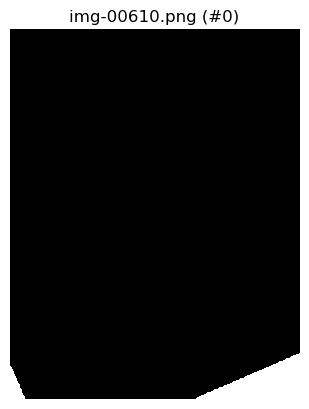

In [19]:
images.filter.type = 'gaussian'
images.filter.size = 10
images.show()

## Reset transforms

<AxesSubplot: title={'center': 'No crop zone defined'}>

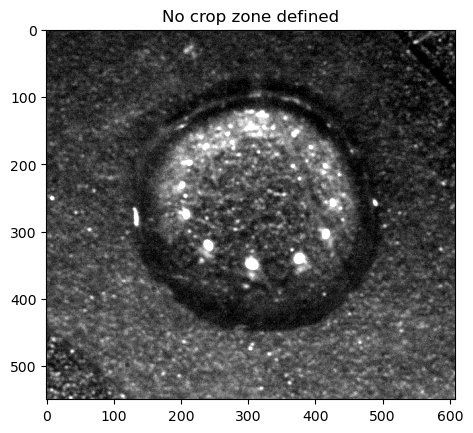

In [20]:
images.rotation.reset()  # similar to setting the angle manually to zero, but rotation.data also gets empty
images.crop.reset()      # similar to setting the cropbox to the total image size, but crop.data also gets emtpy
images.filter.reset()
images.crop.show(num=33)

## Save and load transform parameters

In [22]:
images.rotation.angle = -70
images.crop.zone = (150, 150, 500, 590)
images.save_transform()  # there are options to specify a custom filename, see help

ValueError: operands could not be broadcast together with shapes (590,500) (500,391) 

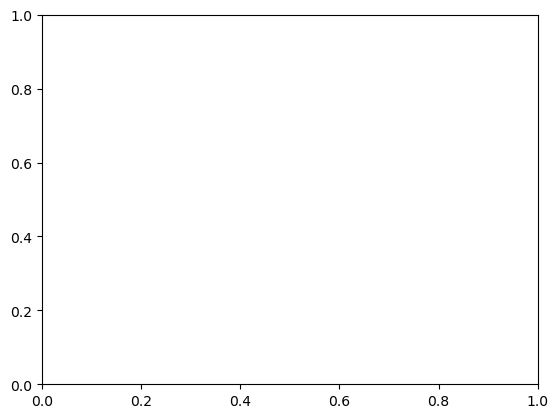

In [23]:
images.load_transform()  # custom filename possible here too
images.rotation.show()

In [ ]:
images.show(num=33)

In order to load and/or show the image without crop/rotation:

In [ ]:
images.read(num=11, transform=False)

In [ ]:
images.show(num=11, transform=False)

# Image timestamps

## Get and save time of images

In [ ]:
images.info.head()  # extracted automatically from the file info (modification time)

In [ ]:
images.save_info()  # save file and timing info from images.info into csv file

## Load time of image from external file

In [ ]:
images.load_info('for-tests-do-not-modify/Img_Files_Saved.tsv')    # replace all file data
images.load_time('for-tests-do-not-modify/Img_Files_Rounded.tsv')  # update only time data
images.info.head()

# Working with tiff stacks

In [ ]:
images = ImgSeries(stack='data/stack/ImgStack.tif', savepath='data/stack')
images.stack

In [ ]:
images.read(10)

In [ ]:
images.show(10)

Note: global rotation, crop, etc. work the same way as for image series from individual files:

In [ ]:
images.rotation.angle = 55
images.crop.zone = (40, 40, 80, 30)
images.crop.show(num=19)